<a href="https://colab.research.google.com/github/ravi-gopalan/lstm_analyses/blob/master/lstm_prediction_WDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=06556274748f81a8b5b73d7cdd7defcf6903f15b3f888a5be62bd9fef091134b
  Stored in directory: /root/.cache/pip/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [0]:
# Importing the libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
# Import yfinance
import yfinance as yf 

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [5]:
!git clone -l -s git://github.com/ravi-gopalan/lstm_analyses.git cloned-repository

Cloning into 'cloned-repository'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 657.74 KiB | 899.00 KiB/s, done.
Resolving deltas: 100% (4/4), done.


In [6]:
!ls

cloned-repository  sample_data


[*********************100%***********************]  1 of 1 downloaded


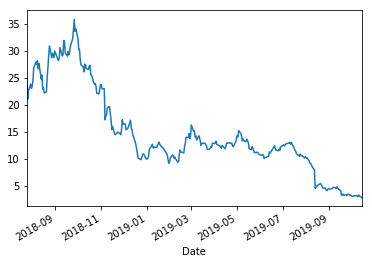

In [7]:
# Get the data for the stock BE by specifying the stock ticker, start date, and end date
df_be = yf.download('BE','2016-01-01','2019-10-15')
 
# Plot the close prices
df_be.Close.plot()
plt.show()

[*********************100%***********************]  1 of 1 downloaded


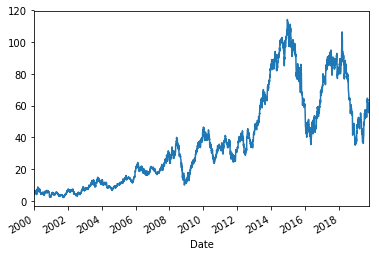

In [8]:
# Get the data for the stock BE by specifying the stock ticker, start date, and end date
df_wdc = yf.download('WDC','2000-01-01','2019-10-15')
 
# Plot the close prices
df_wdc.Close.plot()
plt.show()

In [9]:
type(df_wdc)

pandas.core.frame.DataFrame

In [10]:
df_wdc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4977 entries, 2000-01-03 to 2019-10-14
Data columns (total 6 columns):
Open         4977 non-null float64
High         4977 non-null float64
Low          4977 non-null float64
Close        4977 non-null float64
Adj Close    4977 non-null float64
Volume       4977 non-null int64
dtypes: float64(5), int64(1)
memory usage: 272.2 KB


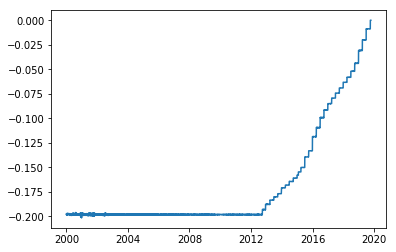

In [11]:
plt.plot((df_wdc['Adj Close']-df_wdc['Close'])/df_wdc['Close'])

In [12]:
df_wdc.head()
df_wdc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,4.25,4.25,3.94,3.94,3.16,2461900
2000-01-04,3.94,5.00,3.88,4.69,3.76,7660300
2000-01-05,4.75,4.75,4.12,4.38,3.51,3944600
2000-01-06,4.50,4.69,4.31,4.56,3.66,2468400
2000-01-07,4.62,5.62,4.62,5.62,4.51,9783000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-08,57.10,57.30,55.40,55.52,55.52,4404300
2019-10-09,56.27,56.97,55.93,56.53,56.53,2242800
2019-10-10,56.40,57.82,56.13,57.34,57.34,2361600
2019-10-11,58.54,59.28,58.01,58.35,58.35,2617800
2019-10-14,59.61,60.23,58.80,59.28,59.28,3758477


In [13]:
df_wdc.drop(columns=['Adj Close'],inplace=True)
df_wdc.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,4.25,4.25,3.94,3.94,2461900
2000-01-04,3.94,5.00,3.88,4.69,7660300
2000-01-05,4.75,4.75,4.12,4.38,3944600
2000-01-06,4.50,4.69,4.31,4.56,2468400
2000-01-07,4.62,5.62,4.62,5.62,9783000


In [14]:
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
roll_mean_wdc = df_wdc['Open'].rolling(window).mean()
roll_std_wdc = df_wdc['Open'].rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
df_wdc['rolling_mean'] = roll_mean_wdc
df_wdc['bollinger_high'] = roll_mean_wdc + (roll_std_wdc * no_of_std)
df_wdc['bollinger_low'] = roll_mean_wdc - (roll_std_wdc * no_of_std)
df_wdc.head()
df_wdc.tail()

,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2000-01-03,4.25,4.25,3.94,3.94,2461900,NaN,NaN,NaN
2000-01-04,3.94,5.00,3.88,4.69,7660300,NaN,NaN,NaN
2000-01-05,4.75,4.75,4.12,4.38,3944600,NaN,NaN,NaN
2000-01-06,4.50,4.69,4.31,4.56,2468400,NaN,NaN,NaN
2000-01-07,4.62,5.62,4.62,5.62,9783000,NaN,NaN,NaN


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2019-10-08,57.10,57.30,55.40,55.52,4404300,61.185238,66.181367,56.189109
2019-10-09,56.27,56.97,55.93,56.53,2242800,60.894762,66.294586,55.494937
2019-10-10,56.40,57.82,56.13,57.34,2361600,60.584762,66.240098,54.929426
2019-10-11,58.54,59.28,58.01,58.35,2617800,60.300000,65.720446,54.879554
2019-10-14,59.61,60.23,58.80,59.28,3758477,60.075714,65.177979,54.973450


In [15]:
df_wdc.iloc[4778,:]

Open              3.804000e+01
High              3.809000e+01
Low               3.582000e+01
Close             3.697000e+01
Volume            6.960500e+06
rolling_mean      4.046000e+01
bollinger_high    4.803532e+01
bollinger_low     3.288468e+01
Name: 2018-12-31 00:00:00, dtype: float64

In [16]:
df_wdc.iloc[2262,:]

Open              1.123000e+01
High              1.158000e+01
Low               1.108000e+01
Close             1.145000e+01
Volume            2.584800e+06
rolling_mean      1.193333e+01
bollinger_high    1.315370e+01
bollinger_low     1.071297e+01
Name: 2008-12-31 00:00:00, dtype: float64

In [17]:
df_wdc.iloc[4882,:]

Open              3.869000e+01
High              3.967000e+01
Low               3.717000e+01
Close             3.722000e+01
Volume            7.121300e+06
rolling_mean      4.424810e+01
bollinger_high    5.118006e+01
bollinger_low     3.731613e+01
Name: 2019-05-31 00:00:00, dtype: float64

In [18]:
df_wdc.iloc[4976,:]

Open              5.961000e+01
High              6.023000e+01
Low               5.880000e+01
Close             5.928000e+01
Volume            3.758477e+06
rolling_mean      6.007571e+01
bollinger_high    6.517798e+01
bollinger_low     5.497345e+01
Name: 2019-10-14 00:00:00, dtype: float64

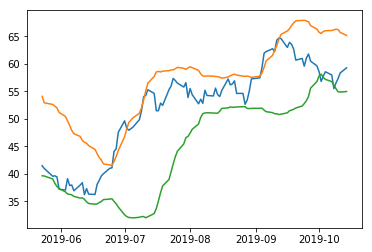

In [19]:
sns.lineplot(data=df_wdc['Close'][-100:])
sns.lineplot(data=df_wdc['bollinger_high'][-100:])
sns.lineplot(data=df_wdc['bollinger_low'][-100:])

In [20]:
df_wdc['Close'].values

array([ 3.94,  4.69,  4.38, ..., 57.34, 58.35, 59.28])

In [21]:
close_array = df_wdc.values
close_array.shape
close_array[:3]
close_array[2263:,3].shape
train_array = close_array[2263:4778,3]
train_array.shape
valid_array = close_array[4778:4882,3]
valid_array.shape
test_array = close_array[4883:,3]
test_array.shape

(4977, 8)

array([[4.2500e+00, 4.2500e+00, 3.9400e+00, 3.9400e+00, 2.4619e+06,
               nan,        nan,        nan],
       [3.9400e+00, 5.0000e+00, 3.8800e+00, 4.6900e+00, 7.6603e+06,
               nan,        nan,        nan],
       [4.7500e+00, 4.7500e+00, 4.1200e+00, 4.3800e+00, 3.9446e+06,
               nan,        nan,        nan]])

(2714,)

(2515,)

(104,)

(94,)

In [26]:
train_array
valid_array
test_array

array([12.33, 12.02, 14.32, ..., 36.93, 36.89, 36.74])

array([36.97, 38.26, 35.65, 37.16, 38.48, 38.11, 39.79, 39.81, 40.03,
       38.06, 37.68, 37.83, 36.47, 39.2 , 37.56, 37.62, 40.14, 43.16,
       44.  , 42.55, 43.83, 44.99, 47.  , 47.85, 47.41, 48.  , 45.86,
       46.71, 45.93, 47.26, 47.69, 47.98, 47.65, 48.  , 48.46, 47.19,
       49.49, 51.36, 50.97, 48.54, 50.3 , 51.66, 52.61, 50.74, 48.12,
       46.99, 47.48, 49.66, 49.15, 48.99, 47.58, 48.1 , 48.29, 47.88,
       47.17, 51.78, 48.39, 47.89, 47.08, 45.38, 45.75, 48.06, 49.31,
       50.38, 52.01, 51.4 , 52.04, 51.59, 50.11, 50.69, 50.83, 51.83,
       51.86, 54.29, 54.45, 55.39, 54.21, 54.45, 53.94, 52.95, 50.92,
       50.47, 51.12, 50.8 , 49.76, 50.8 , 49.56, 47.21, 46.7 , 46.42,
       45.86, 42.99, 44.63, 45.49, 45.09, 44.63, 41.95, 43.45, 42.19,
       41.49, 40.98, 39.58, 39.66, 39.46])

array([37.08, 39.14, 37.9 , 37.99, 36.94, 37.98, 38.41, 36.24, 37.34,
       36.33, 36.27, 38.11, 38.84, 39.64, 40.04, 41.03, 41.1 , 44.1 ,
       44.55, 47.55, 49.65, 48.33, 47.94, 48.52, 49.87, 51.48, 54.04,
       54.26, 55.3 , 54.64, 51.49, 51.49, 52.88, 52.46, 55.31, 55.98,
       57.36, 56.97, 56.5 , 55.79, 56.59, 53.89, 55.51, 54.39, 52.75,
       53.58, 52.83, 55.2 , 54.26, 54.17, 55.6 , 54.43, 54.06, 55.19,
       57.25, 56.19, 56.35, 56.92, 54.63, 54.64, 52.66, 53.44, 55.08,
       57.27, 57.47, 59.33, 61.95, 62.24, 62.75, 62.27, 64.3 , 64.7 ,
       64.6 , 62.99, 63.91, 63.56, 62.65, 60.68, 60.99, 59.58, 61.05,
       61.8 , 60.49, 59.64, 58.59, 56.82, 57.78, 58.57, 57.99, 55.52,
       56.53, 57.34, 58.35, 59.28])

In [113]:
#Scale the close data

def scale_all_inputs(train_array, valid_array, test_array):
  sc_model = MinMaxScaler((0, 1))
  train_scaled_array = sc_model.fit_transform(train_array.reshape(-1, 1))
  valid_scaled_array = sc_model.transform(valid_array.reshape(-1, 1))
  test_scaled_array = sc_model.transform(test_array.reshape(-1, 1))
  print(train_scaled_array.shape, valid_scaled_array.shape, test_scaled_array.shape)
  return sc_model, train_scaled_array, valid_scaled_array, test_scaled_array 

sc_wdc, train_scale_wdc, valid_scale_wdc, test_scale_wdc = scale_all_inputs(train_array, valid_array, test_array)

(2515, 1) (104, 1) (94, 1)


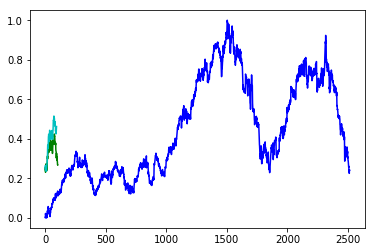

In [28]:
plt.plot(train_scale_wdc,color='b',label='close')
plt.plot(valid_scale_wdc,color='g',label='close')
plt.plot(test_scale_wdc,color='c',label='close')

In [107]:
# Create data structures with x timesteps and 1 output

def create_data_structures(timesteps, train_array, valid_array, test_array):
  sc_model, train_scaled_array, valid_scaled_array, test_scaled_array = scale_all_inputs(train_array, valid_array, test_array)
  
  
  X_train = []
  y_train = []
  for i in range(timesteps, train_array.shape[0]):
    X_train.append(train_scaled_array[i-timesteps:i,0])
    y_train.append(train_scaled_array[i,0])
  X_train, y_train  = np.array(X_train), np.array(y_train)
  #reshape
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
  print(X_train.shape, y_train.shape)

  X_valid = []
  for i in range(timesteps, timesteps+valid_scaled_array.shape[0]):
    X_valid.append(np.concatenate((train_scaled_array[-timesteps:],valid_scaled_array),0)[i-timesteps:i,0])
  X_valid = np.array(X_valid)
  X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
  print(X_valid.shape)

  X_test = []
  for i in range(timesteps, timesteps+test_scaled_array.shape[0]):
    X_test.append(np.concatenate((valid_scaled_array[-timesteps:],test_scaled_array),0)[i-timesteps:i,0])
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  print(X_test.shape)

  return sc_model, X_train, y_train, X_valid, X_test

sc_model, X_train, y_train, X_valid, X_test = create_data_structures(30, train_array, valid_array, test_array)

(2515, 1) (104, 1) (94, 1)
(2485, 30, 1) (2485,)
(104, 30, 1)
(94, 30, 1)


In [29]:
# Creating a data structure with 30 timesteps and 1 output
timesteps=15
X_train = []
y_train = []
for i in range(timesteps, train_array.shape[0]):
    X_train.append(train_scale_wdc[i-timesteps:i, 0])
    y_train.append(train_scale_wdc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape, y_train.shape

((2500, 15, 1), (2500,))

In [30]:
valid_scale_wdc.shape

X_valid = []
for i in range(timesteps, timesteps+valid_scale_wdc.shape[0]):
    X_valid.append(np.concatenate((train_scale_wdc[-timesteps:],valid_scale_wdc),0)[i-timesteps:i,0])

X_valid = np.array(X_valid)
X_valid.shape
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
X_valid.shape


(104, 1)

(104, 15)

(104, 15, 1)

In [31]:
test_scale_wdc.shape
X_test = []
for i in range(timesteps, timesteps+test_scale_wdc.shape[0]):
    X_test.append(np.concatenate((valid_scale_wdc[-timesteps:],test_scale_wdc),0)[i-timesteps:i,0])

X_test = np.array(X_test)
X_test.shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(94, 1)

(94, 15)

(94, 15, 1)

In [0]:
def create_lstm_model(X_train):
  # Initialising the RNN
  regressor = Sequential()

  # Adding the first LSTM layer and some Dropout regularisation
  regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
  regressor.add(Dropout(rate=0.2))

  # Adding a second LSTM layer and some Dropout regularisation
  regressor.add(LSTM(units = 100, return_sequences = True))
  regressor.add(Dropout(rate=0.2))

  # Adding a third LSTM layer and some Dropout regularisation
  regressor.add(LSTM(units = 100, return_sequences = True))
  regressor.add(Dropout(rate=0.2))

  # Adding a fourth LSTM layer and some Dropout regularisation
  regressor.add(LSTM(units = 100))
  regressor.add(Dropout(rate=0.2))

  # Adding the output layer
  regressor.add(Dense(units = 1))

  return regressor

regressor = create_lstm_model(X_train)

In [0]:
# Compiling the RNN
regressor.compile(optimizer = 'nadam', loss = 'mean_squared_error')

In [68]:
epoch_trials = [100]
batch_size_trials = [128]

reg_models = []

# Fitting the RNN to the Training set
for n_epochs in epoch_trials:
  for b_size in batch_size_trials:
    regressor.fit(X_train, y_train, epochs = n_epochs, batch_size = b_size)
    reg_models.append(regressor)


Epoch 1/100
2485/2485 [==============================] - 8s 3ms/step - loss: 0.0456
Epoch 2/100
2485/2485 [==============================] - 6s 2ms/step - loss: 0.0126
Epoch 3/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0085
Epoch 4/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0052
Epoch 5/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0057
Epoch 6/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0055
Epoch 7/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0065
Epoch 8/100
2485/2485 [==============================] - 6s 2ms/step - loss: 0.0042
Epoch 9/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0058
Epoch 10/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0036
Epoch 11/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0041
Epoch 12/100
2485/2485 [==============================] - 6s 2ms/step - lo

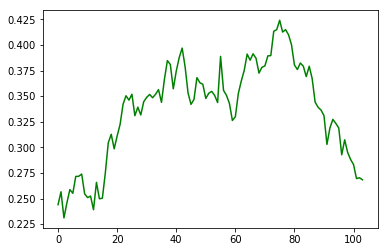

In [35]:
#plt.plot(valid_array,color='b',label='valid-close')
plt.plot(valid_scale_wdc,color='g',label='valid-close')

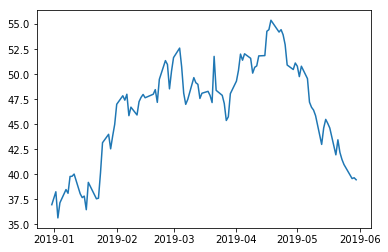

In [36]:
plt.plot(df_wdc['Close'][4778:4882])


In [0]:
valid_preds = []
test_preds = []
for reg_model in reg_models:
  valid_preds.append(sc_wdc.inverse_transform(reg_model.predict(X_valid)))
  test_preds.append(sc_wdc.inverse_transform(reg_model.predict(X_test)))



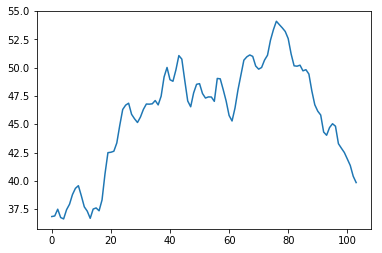

In [70]:
plt.plot(valid_preds[0])

In [97]:
prices[0].shape
valid_array.shape

(104, 1)

(104,)

Text(0.5, 1.0, 'WDC Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'WDC Stock Price')

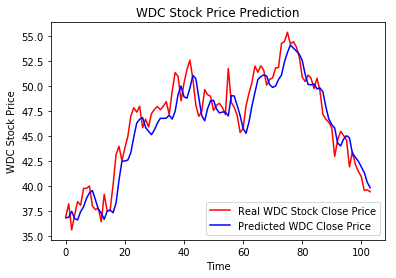

In [71]:
# Visualising the results
plt.plot(valid_array, color = 'red', label = 'Real WDC Stock Close Price')
plt.plot(valid_preds[0], color = 'blue', label = 'Predicted WDC Close Price')
plt.title('WDC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('WDC Stock Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'WDC Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'WDC Stock Price')

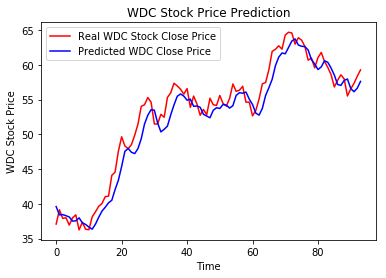

In [72]:
# Visualising the results
plt.plot(test_array, color = 'red', label = 'Real WDC Stock Close Price')
plt.plot(test_preds[0], color = 'blue', label = 'Predicted WDC Close Price')
plt.title('WDC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('WDC Stock Price')
plt.legend()
plt.show()

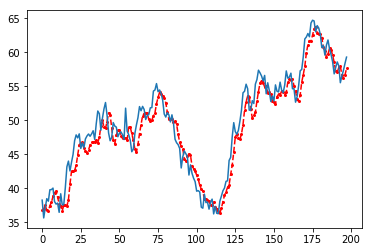

In [94]:
plt.plot(np.concatenate((valid_preds[0],test_preds[0]),0),'ro--',markersize=2)
plt.plot(df_wdc.Close.values[-(valid_preds[0].shape[0]+test_preds[0].shape[0]):])

In [0]:
reg_models[0].save('reg_model_wdc.hdf5')

In [83]:
train_array.shape
valid_preds[0].shape

(2515,)

(104, 1)

In [86]:
train_array.reshape(-1,1).shape

(2515, 1)

In [95]:
df_be.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 2018-07-25 to 2019-10-14
Data columns (total 6 columns):
Open         308 non-null float64
High         308 non-null float64
Low          308 non-null float64
Close        308 non-null float64
Adj Close    308 non-null float64
Volume       308 non-null int64
dtypes: float64(5), int64(1)
memory usage: 16.8 KB


In [97]:
train_be = np.array(df_be.Close[:-60])
valid_be = np.array(df_be.Close[-60:-30])
test_be = np.array(df_be.Close[-30:])
train_be.shape, valid_be.shape, test_be.shape
train_be, valid_be, test_be

((248,), (30,), (30,))

(array([25.  , 21.01, 22.6 , 23.85, 23.05, 23.5 , 24.5 , 26.8 , 27.94,
        27.45, 28.15, 26.72, 27.65, 24.76, 25.51, 22.91, 23.13, 22.2 ,
        22.42, 25.27, 27.  , 29.28, 30.91, 28.69, 29.55, 29.15, 28.75,
        29.95, 28.5 , 28.21, 28.7 , 30.58, 29.05, 29.26, 31.91, 31.68,
        29.58, 29.  , 29.92, 29.25, 30.01, 30.95, 32.25, 34.08, 35.8 ,
        33.6 , 34.08, 32.27, 30.22, 30.25, 28.34, 27.37, 27.07, 26.1 ,
        27.54, 27.38, 26.68, 26.6 , 27.18, 27.32, 25.57, 25.51, 24.15,
        23.82, 23.92, 23.44, 22.17, 22.03, 22.98, 23.75, 23.74, 22.96,
        23.01, 17.25, 18.01, 18.09, 19.45, 19.7 , 18.51, 17.29, 15.46,
        16.04, 14.5 , 14.55, 14.67, 14.99, 14.7 , 14.5 , 15.45, 17.26,
        16.45, 16.5 , 15.39, 15.62, 15.87, 17.17, 15.65, 15.44, 14.4 ,
        14.12, 12.75, 12.  , 11.15, 10.22, 10.08,  9.9 , 10.78, 10.96,
        10.83,  9.98, 10.12, 10.47, 11.83, 12.41, 12.73, 12.14, 12.02,
        12.24, 12.15, 12.59, 12.82, 13.11, 12.67, 12.02, 12.  , 11.58,
      

In [121]:
sc_be, X_train_be, y_train_be, X_valid_be, X_test_be = create_data_structures(10, train_be, valid_be, test_be)

(248, 1) (30, 1) (30, 1)
(238, 10, 1) (238,)
(30, 10, 1)
(30, 10, 1)


In [0]:
regressor = create_lstm_model(X_train_be)
# Compiling the RNN
regressor.compile(optimizer = 'nadam', loss = 'mean_squared_error')

In [123]:
epoch_trials = [200]
batch_size_trials = [32]

reg_models = []

# Fitting the RNN to the Training set
for n_epochs in epoch_trials:
  for b_size in batch_size_trials:
    regressor.fit(X_train_be, y_train_be, epochs = n_epochs, batch_size = b_size)
    reg_models.append(regressor)

Epoch 1/200
238/238 [==============================] - 7s 30ms/step - loss: 0.0780
Epoch 2/200
238/238 [==============================] - 1s 3ms/step - loss: 0.0232
Epoch 3/200
238/238 [==============================] - 1s 3ms/step - loss: 0.0134
Epoch 4/200
238/238 [==============================] - 1s 3ms/step - loss: 0.0129
Epoch 5/200
238/238 [==============================] - 1s 3ms/step - loss: 0.0190
Epoch 6/200
238/238 [==============================] - 1s 3ms/step - loss: 0.0126
Epoch 7/200
238/238 [==============================] - 1s 3ms/step - loss: 0.0118
Epoch 8/200
238/238 [==============================] - 1s 3ms/step - loss: 0.0110
Epoch 9/200
238/238 [==============================] - 1s 3ms/step - loss: 0.0085
Epoch 10/200
238/238 [==============================] - 1s 3ms/step - loss: 0.0101
Epoch 11/200
238/238 [==============================] - 1s 3ms/step - loss: 0.0155
Epoch 12/200
238/238 [==============================] - 1s 3ms/step - loss: 0.0103
Epoch 13/200

In [0]:
valid_preds = []
test_preds = []
for reg_model in reg_models:
  valid_preds.append(sc_be.inverse_transform(reg_model.predict(X_valid_be)))
  test_preds.append(sc_be.inverse_transform(reg_model.predict(X_test_be)))

Text(0.5, 1.0, 'BE Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'BE Stock Price')

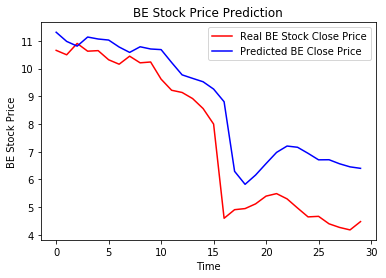

In [125]:
# Visualising the results
plt.plot(valid_be, color = 'red', label = 'Real BE Stock Close Price')
plt.plot(valid_preds[0], color = 'blue', label = 'Predicted BE Close Price')
plt.title('BE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BE Stock Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'BE Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'BE Stock Price')

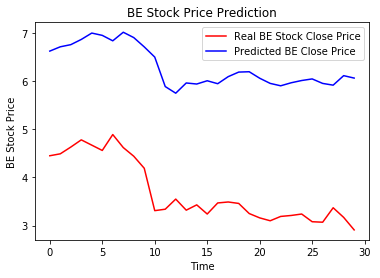

In [126]:
# Visualising the results
plt.plot(test_be, color = 'red', label = 'Real BE Stock Close Price')
plt.plot(test_preds[0], color = 'blue', label = 'Predicted BE Close Price')
plt.title('BE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BE Stock Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 downloaded


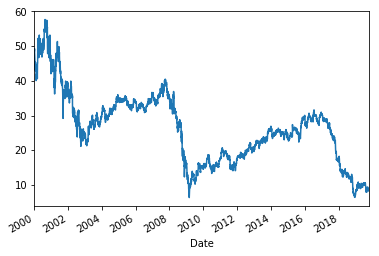

In [127]:
# Get the data for the stock BE by specifying the stock ticker, start date, and end date
df_ge = yf.download('GE','2000-01-01','2019-10-15')
 
# Plot the close prices
df_ge.Close.plot()
plt.show()

In [128]:
train_ge = df_ge.values[2263:4778,3]
train_ge.shape
valid_ge = df_ge.values[4778:4882,3]
valid_ge.shape
test_ge = df_ge.values[4883:,3]
test_ge.shape

(2515,)

(104,)

(94,)

In [129]:
sc_ge, X_train_ge, y_train_ge, X_valid_ge, X_test_ge = create_data_structures(30, train_ge, valid_ge, test_ge)

(2515, 1) (104, 1) (94, 1)
(2485, 30, 1) (2485,)
(104, 30, 1)
(94, 30, 1)


In [0]:
regressor_ge = create_lstm_model(X_train_ge)
# Compiling the RNN
regressor_ge.compile(optimizer = 'nadam', loss = 'mean_squared_error')

In [131]:
epoch_trials = [100, 200]
batch_size_trials = [128]

reg_models_ge = []

# Fitting the RNN to the Training set
for n_epochs in epoch_trials:
  for b_size in batch_size_trials:
    regressor_ge.fit(X_train_ge, y_train_ge, epochs = n_epochs, batch_size = b_size)
    reg_models_ge.append(regressor_ge)

Epoch 1/100
2485/2485 [==============================] - 13s 5ms/step - loss: 0.1054
Epoch 2/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0126
Epoch 3/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0075
Epoch 4/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0082
Epoch 5/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0064
Epoch 6/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0048
Epoch 7/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0076
Epoch 8/100
2485/2485 [==============================] - 6s 2ms/step - loss: 0.0045
Epoch 9/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0036
Epoch 10/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0061
Epoch 11/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0050
Epoch 12/100
2485/2485 [==============================] - 5s 2ms/step - l

Epoch 1/200
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 2/200
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0015
Epoch 3/200
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0011
Epoch 4/200
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 5/200
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0011
Epoch 6/200
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 7/200
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0011
Epoch 8/200
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0014
Epoch 9/200
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 10/200
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 11/200
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0011
Epoch 12/200
2485/2485 [==============================] - 5s 2ms/step - lo

In [0]:
valid_preds_ge = []
test_preds_ge = []
for reg_model in reg_models_ge:
  valid_preds_ge.append(sc_ge.inverse_transform(reg_model.predict(X_valid_ge)))
  test_preds_ge.append(sc_ge.inverse_transform(reg_model.predict(X_test_ge)))

Text(0.5, 1.0, 'GE Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'GE Stock Price')

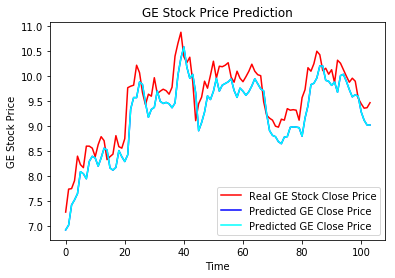

In [135]:
# Visualising the results
plt.plot(valid_ge, color = 'red', label = 'Real GE Stock Close Price')
plt.plot(valid_preds_ge[0], color = 'blue', label = 'Predicted GE Close Price')
plt.plot(valid_preds_ge[1], color = 'cyan', label = 'Predicted GE Close Price')
plt.title('GE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GE Stock Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'GE Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'GE Stock Price')

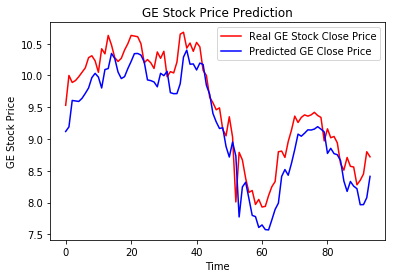

In [136]:
# Visualising the results
plt.plot(test_ge, color = 'red', label = 'Real GE Stock Close Price')
plt.plot(test_preds_ge[0], color = 'blue', label = 'Predicted GE Close Price')
plt.title('GE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GE Stock Price')
plt.legend()
plt.show()

In [148]:
np.datetime_as_string(df_ge.index.values[-94:], unit='D')

array(['2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
       '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12',
       '2019-06-13', '2019-06-14', '2019-06-17', '2019-06-18',
       '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-24',
       '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
       '2019-07-01', '2019-07-02', '2019-07-03', '2019-07-05',
       '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11',
       '2019-07-12', '2019-07-15', '2019-07-16', '2019-07-17',
       '2019-07-18', '2019-07-19', '2019-07-22', '2019-07-23',
       '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-29',
       '2019-07-30', '2019-07-31', '2019-08-01', '2019-08-02',
       '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08',
       '2019-08-09', '2019-08-12', '2019-08-13', '2019-08-14',
       '2019-08-15', '2019-08-16', '2019-08-19', '2019-08-20',
       '2019-08-21', '2019-08-22', '2019-08-23', '2019-08-26',
       '2019-08-27', '2019-08-28', '2019-08-29', '2019-

In [175]:
plot_data = pd.DataFrame(np.datetime_as_string(df_ge.index.values[-94:], unit='D'))
plot_data.columns = ['date']

plot_data['close_price']=test_ge
plot_data['pred_close_price']=test_preds_ge[0]
plot_data.head()
plot_data.tail()

,date,close_price,pred_close_price
0,2019-06-03,9.53,9.118612
1,2019-06-04,10.00,9.190796
2,2019-06-05,9.89,9.606743
3,2019-06-06,9.92,9.598985
4,2019-06-07,9.98,9.591146


,date,close_price,pred_close_price
89,2019-10-08,8.28,8.218475
90,2019-10-09,8.35,7.966403
91,2019-10-10,8.45,7.967775
92,2019-10-11,8.80,8.076447
93,2019-10-14,8.72,8.411800


In [173]:
index = pd.date_range(start='06/03/2019', end='10/14/2019', name="date")
index

DatetimeIndex(['2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-07', '2019-06-08', '2019-06-09', '2019-06-10',
               '2019-06-11', '2019-06-12',
               ...
               '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08',
               '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-12',
               '2019-10-13', '2019-10-14'],
              dtype='datetime64[ns]', name='date', length=134, freq='D')

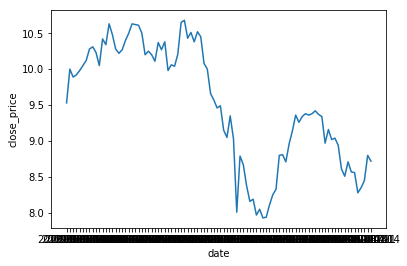

In [184]:
sns.lineplot(data=plot_data,x='date',y='close_price')
